In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cpath='../content/Data/Charge/B0005.csv'
dpath='../content/Data/Discharge/B0005.csv'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import zipfile

In [0]:
zipref=zipfile.ZipFile('../content/drive/My Drive/Data.zip')
zipref.extractall()
zipref.close()

In [0]:
df2=pd.read_csv(cpath)

In [0]:
df2.Date[0]

'02 Apr 2008, 13:08:17'

In [0]:
df2.Date=pd.to_datetime(df2.Date)

In [0]:
df2=df2.set_index('Date')

In [0]:
df2.dtypes

Unnamed: 0           int64
current_battery    float64
current_load       float64
temp_battery       float64
time               float64
voltage_battery    float64
voltage_load       float64
Cycle                int64
dtype: object

In [0]:
df2=df2.drop('Unnamed: 0',axis=1)

In [0]:
df2.head()

,current_battery,current_load,temp_battery,time,voltage_battery,voltage_load,Cycle
Date,,,,,,,
2008-04-02 13:08:17,-0.001201,0.000,24.655358,0.000,3.873017,0.003,0
2008-04-02 13:08:17,-4.030268,-4.036,24.666480,2.532,3.479394,1.570,0
2008-04-02 13:08:17,1.512731,1.500,24.675394,5.500,4.000588,4.726,0
2008-04-02 13:08:17,1.509063,1.500,24.693865,8.344,4.012395,4.742,0
2008-04-02 13:08:17,1.511318,1.500,24.705069,11.125,4.019708,4.753,0


In [0]:
sns.set(rc={'figure.figsize':(11,4)})

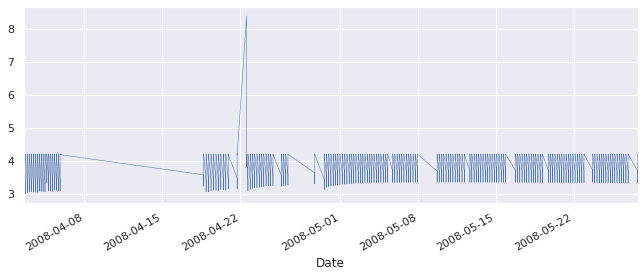

In [0]:
df2['voltage_battery'].plot(linewidth=0.5)

OUTLIER at 22-04-2008

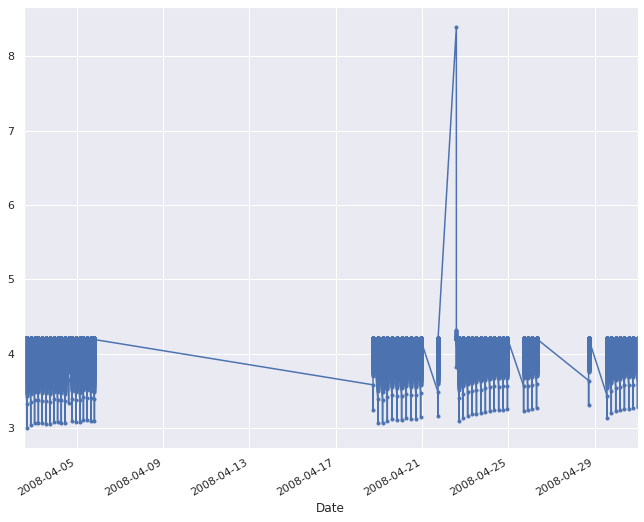

In [0]:
cols=['current_battery','current_load','temp_battery','time','voltage_battery','voltage_load']
axes=df2.loc['04-2008','voltage_battery'].plot(marker='.',alpha=1.0,figsize=(11,9),subplots=True)


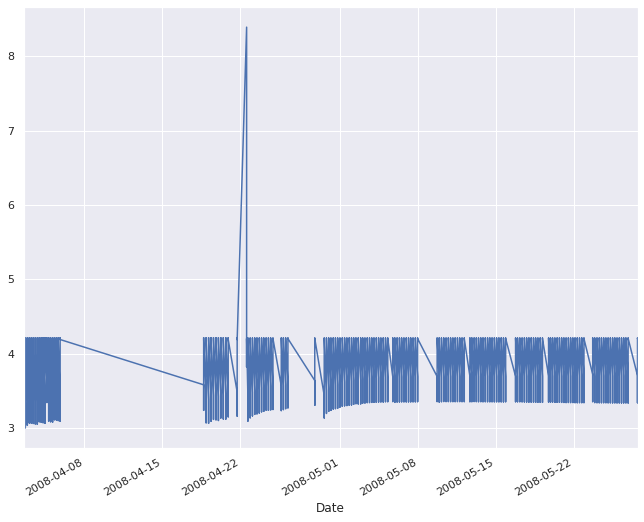

In [0]:
axes=df2['voltage_battery'].plot(alpha=1.0,figsize=(11,9),subplots=True)

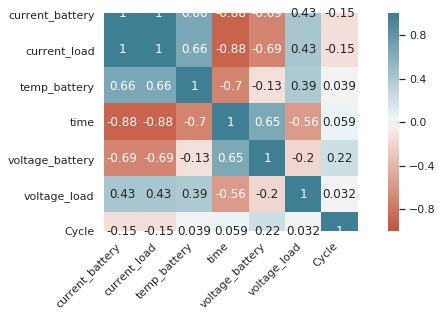

In [0]:
corr=df2.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Heightest correlation feature-: Current Battery


In [0]:
df4=df2.drop('current_battery',axis=1)

In [0]:
df4.dtypes

current_load       float64
temp_battery       float64
time               float64
voltage_battery    float64
voltage_load       float64
Cycle                int64
dtype: object

Correlation Matrix after dropping the highest feature

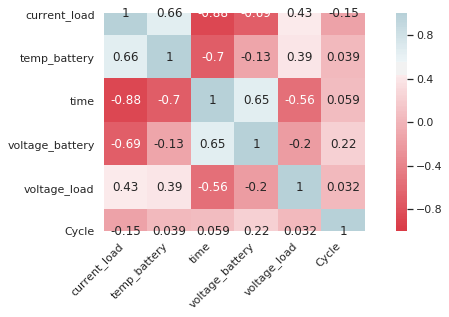

In [0]:
corr=df4.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0.5, cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

RESAMPLING

In [0]:
cols=['current_battery','current_load','temp_battery','time','voltage_battery','voltage_load']

In [0]:
df_mean=df2[cols].resample('10S').mean()

In [0]:
df_mean[df_mean['time']!='NaN']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,current_battery,current_load,temp_battery,time,voltage_battery,voltage_load
Date,,,,,,
2008-04-02 13:08:10,0.643455,0.638452,25.324079,2725.952433,4.187420,4.359487
2008-04-02 13:08:20,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 13:08:30,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 13:08:40,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 13:08:50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-05-27 17:53:10,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27 17:53:20,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27 17:53:30,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
len(df_mean)

476915

In [0]:
df2.dtypes

current_battery    float64
current_load       float64
temp_battery       float64
time               float64
voltage_battery    float64
voltage_load       float64
Cycle                int64
dtype: object

ANOMALY DETECTION

In [0]:
df2['voltage_battery'].describe()

count    541168.000000
mean          4.158656
std           0.097758
min           3.001951
25%           4.195474
50%           4.205310
75%           4.205978
max           8.393141
Name: voltage_battery, dtype: float64

MAX=8.393141, with mean=4.158, Point Anomaly

In [0]:
df2[df2['voltage_battery']==8.393141180564632]

,current_battery,current_load,temp_battery,time,voltage_battery,voltage_load,Cycle
Date,,,,,,,
2008-04-22 14:15:41,-0.000667,0.0,23.898678,0.0,8.393141,0.003,84


In [0]:
df2.describe()

,current_battery,current_load,temp_battery,time,voltage_battery,voltage_load,Cycle
count,541168.000000,541168.000000,541168.000000,541168.000000,541168.000000,541168.000000,541168.000000
mean,0.571548,0.566815,25.770650,5062.882782,4.158656,4.184440,331.268931
std,0.620455,0.616016,1.643721,3114.775331,0.097758,1.112767,164.747771
min,-4.479660,-4.468000,23.246728,0.000000,3.001951,0.003000,0.000000
25%,0.058024,0.057000,24.438673,2271.738250,4.195474,4.250000,195.000000
50%,0.227546,0.225000,25.255238,4982.164000,4.205310,4.332000,333.000000
75%,1.506509,1.498000,26.819839,7763.238750,4.205978,4.688000,474.000000
max,1.531301,1.500000,31.187718,10807.328000,8.393141,5.002000,612.000000


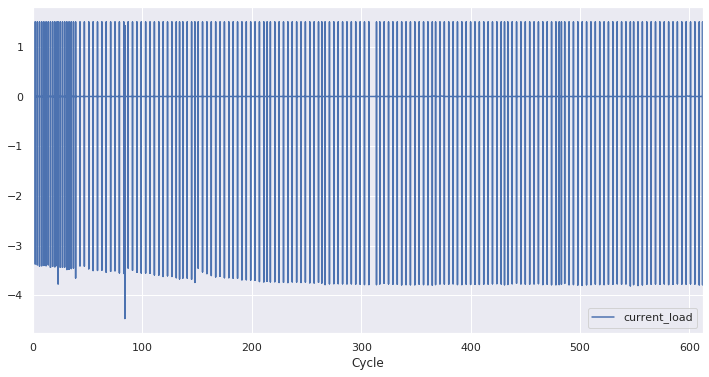

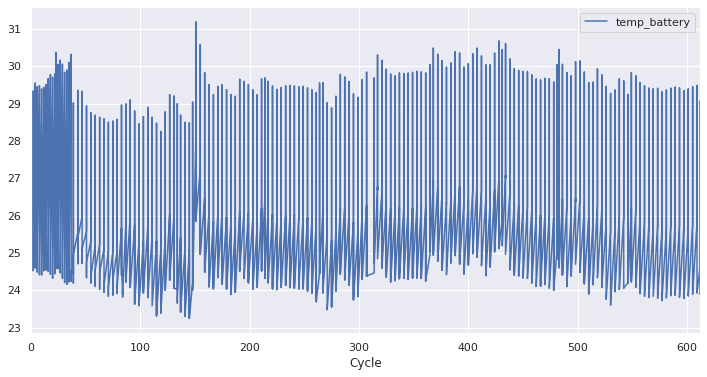

In [0]:
df2.plot(x='Cycle', y='current_load', figsize=(12,6))
df2.plot(x='Cycle', y='temp_battery', figsize=(12,6))

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


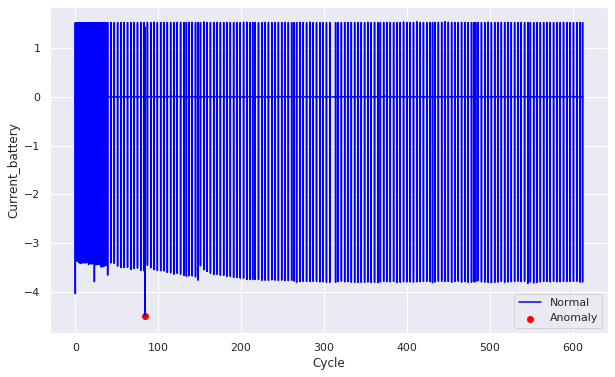

In [0]:
anomaly=df2['current_battery'].min()
a = df2.loc[df2['current_battery']==anomaly]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df2['Cycle'],df2['current_battery'], color='blue', label='Normal')
ax.scatter(a['Cycle'],a['current_battery'], color='red', label='Anomaly')
plt.xlabel('Cycle')
plt.ylabel('Current_battery')
plt.legend()
plt.show();

In [0]:
anomaly=df2['voltage_battery'].max()
anomaly

8.393141180564632

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


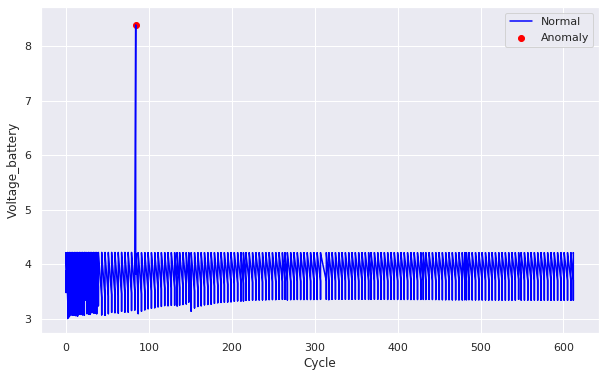

In [0]:
a = df2.loc[df2['voltage_battery']==anomaly]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df2['Cycle'],df2['voltage_battery'], color='blue', label='Normal')
ax.scatter(a['Cycle'],a['voltage_battery'], color='red', label='Anomaly')
plt.xlabel('Cycle')
plt.ylabel('Voltage_battery')
plt.legend()
plt.show();

In [0]:
anomaly=df2['current_battery'].min()
a = df2.loc[df2['current_battery']==anomaly]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df2['Cycle'],df2['current_battery'], color='blue', label='Normal')
ax.scatter(a['Cycle'],a['current_battery'], color='red', label='Anomaly')
plt.xlabel('Cycle')
plt.ylabel('Current_battery')
plt.legend()
plt.show();